# KNN for Iris flowers classification

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

In [2]:
# load iris dataset
iris = ds.load_iris()

In [3]:
# assign iris features to X, an array of shape (150,4)
# assign iris labels to y, an array of shape (150,)
X = iris['data']
y = iris['target']

In [4]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## (a) calculate elements in each class

In [5]:
# calculate elements in each class
# print out the result
## to do
result = [0]*3
for target in y:
    result[target] += 1
for i in range(3):
    print("There are", result[i], "elements in class target=", i)

There are 50 elements in class target= 0
There are 50 elements in class target= 1
There are 50 elements in class target= 2


## (b) build a KNeighborsClassifier with k=1

In [6]:
# initialize the knn model
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [7]:
# calculate prediction accuracy
# print out the accuracy
## to do
outcome = model_knn.predict(X)

def accuracy(predict_outcome, train_outcome):
    error = 0
    total = len(predict_outcome)
    for i in range(total):
        if predict_outcome[i] != train_outcome[i]:
            error += 1
    
    return (1 - error/total)*100

print("The accuaracy is", accuracy(outcome, y), "%")
  

The accuaracy is 100.0 %


## (c) find optimal value of k

In [8]:
# split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0)

In [9]:
# try different value of k from 1 to 50
K = 50
train_accu = np.zeros(50)
test_accu = np.zeros(50)
for i in range(1,K+1):
    # initialize the model
    # fit the data
    # store training accuracy in train_accu
    # store validation accuracy in test_acc
    ## to do
    k_model = KNeighborsClassifier(n_neighbors=i)
    k_model.fit(X_train, y_train)
    train_accu[i-1] = accuracy(k_model.predict(X_train), y_train)
    test_accu[i-1] = accuracy(k_model.predict(X_test), y_test)

print(test_accu)


[90.66666667 89.33333333 93.33333333 92.         96.         93.33333333
 96.         94.66666667 97.33333333 94.66666667 94.66666667 93.33333333
 93.33333333 93.33333333 93.33333333 92.         92.         92.
 90.66666667 89.33333333 92.         90.66666667 90.66666667 90.66666667
 92.         90.66666667 90.66666667 90.66666667 88.         88.
 86.66666667 86.66666667 88.         88.         88.         88.
 82.66666667 86.66666667 86.66666667 85.33333333 77.33333333 72.
 70.66666667 70.66666667 69.33333333 69.33333333 69.33333333 69.33333333
 69.33333333 69.33333333]


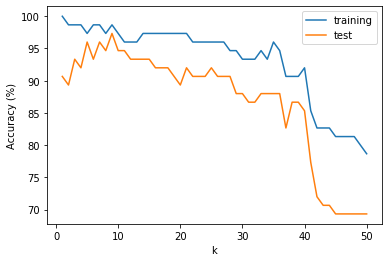

In [10]:
# plot the training accuracy and test accuracy against k
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
x_range = np.linspace(1, K, num=K)
plt.plot(x_range, train_accu, label='training')
plt.plot(x_range, test_accu, label='test')
plt.legend()

In [11]:
# find the optimal k value
# print out the optimal k
## to do
optimal_k = test_accu.argmax() + 1
print("The optimal k value is", optimal_k)

The optimal k value is 9


## (d) predict a new sample

In [12]:
# check the order of the features
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# match the input values with the feature names
## to do
new_sample = np.array([[3.8, 5.0, 1.2, 4.1]])

In [14]:
# make prediction
# print out the prediction result
## to do
k_model = KNeighborsClassifier(n_neighbors=9)
k_model.fit(X_train, y_train)
prediction = k_model.predict(new_sample)
print("The prediction result is", prediction[0], ", which represents", iris["target_names"][prediction[0]])

The prediction result is 0 , which represents setosa
